In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error as mse

C:\Users\Rohit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
a=pd.read_csv(r'Downloads\sales-of-shampoo-over-a-three-year-period.csv')
a.head(37)

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [31]:
a=a.drop([36])
a.shape

(36, 2)

In [32]:
a['Month']=a['Month'].apply(lambda x:datetime.strptime('190'+x,'%Y-%m'))
a.set_index('Month',inplace=True)
a.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [33]:
a=a['Sales of shampoo over a three year period']
type(a)

pandas.core.series.Series

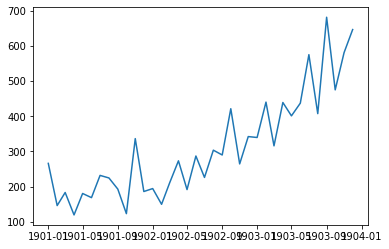

In [34]:
plt.plot(a);

In [35]:
def test_stationarity(timeseries):
    rolling_mean=timeseries.rolling(window=4,center=False).mean()
    rolling_std=timeseries.rolling(window=4,center=False).std()
    
    original=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std=plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','#lags used','#obsevations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

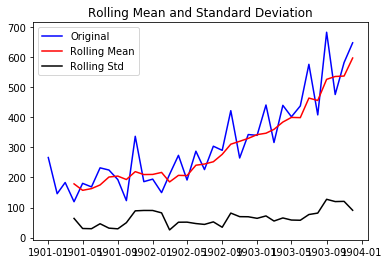

Dickey-Fuller test:
Test statistic           3.060142
p-value                  1.000000
#lags used              10.000000
#obsevations used       25.000000
Critical value (1%)     -3.723863
Critical value (5%)     -2.986489
Critical value (10%)    -2.632800
dtype: float64


In [36]:
test_stationarity(a)

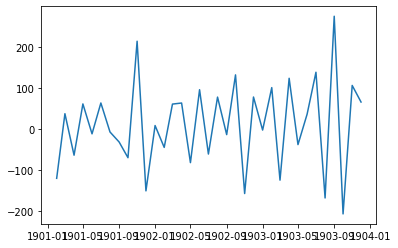

In [37]:
a_diff=a-a.shift()
plt.plot(a_diff);

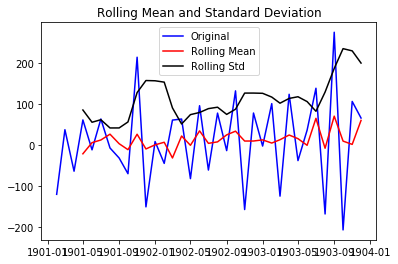

Dickey-Fuller test:
Test statistic         -7.249074e+00
p-value                 1.799857e-10
#lags used              1.000000e+00
#obsevations used       3.300000e+01
Critical value (1%)    -3.646135e+00
Critical value (5%)    -2.954127e+00
Critical value (10%)   -2.615968e+00
dtype: float64


In [38]:
a_diff.dropna(inplace=True)
test_stationarity(a_diff)

C:\Users\Rohit\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


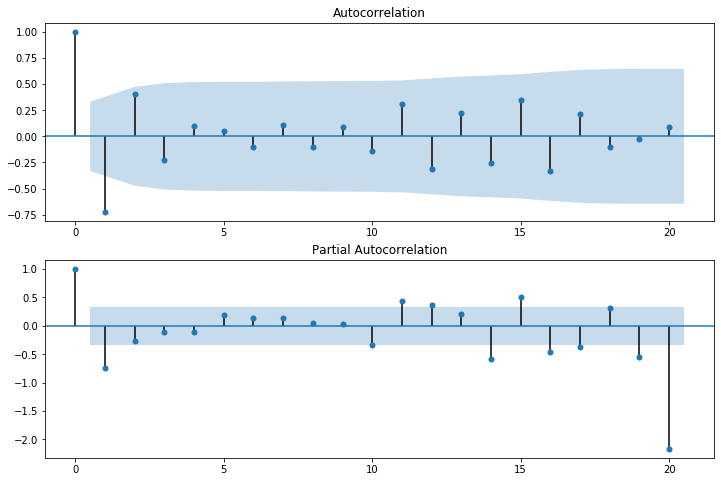

In [39]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(a_diff,lags=20,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(a_diff,lags=20,ax=ax2)

C:\Users\Rohit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 9439.3324')

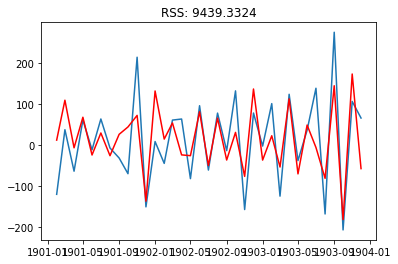

In [40]:
model=ARIMA(a,order=(1,1,0))
results_ARIMA=model.fit()
plt.plot(a_diff)
plt.plot(results_ARIMA.fittedvalues,color='red');
plt.title('RSS: %.4f'% sum(results_ARIMA.fittedvalues-a_diff)**2)

In [41]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()

In [42]:
predictions_ARIMA=pd.Series(a.iloc[0],index=a.index)
predictions_ARIMA=predictions_ARIMA.add(predictions_ARIMA_diff_cumsum,fill_value=0)

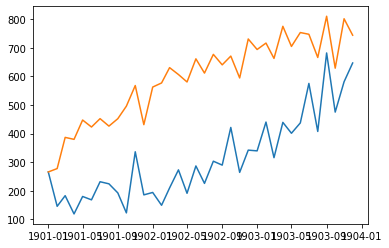

In [43]:
plt.plot(a)
plt.plot(predictions_ARIMA);

In [44]:
mse=mse(a,predictions_ARIMA)
mse

86826.25268961983